In [1]:
import sys
sys.path.append(r'D:\Usuario\Pablo\Escritorio\workspace\metodos_numericos')

import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from helpers import *
from modulos.precision import *

In [2]:
plt.style.use('fivethirtyeight')

## Seteo de la presición global de representación, no afecta los cálculos

In [3]:
Presicion().cambiarPresicionRepresentacion(0.0001)
Presicion.presicionActual()

4

## Importacion de la base de datos

In [4]:
df = pd.read_excel("ACUMULADOSvsDIAS.xlsx")
x_col = df.iloc[:,0]
y_col = df.iloc[:,1]
df.head()

,día,acumulados
0,1,1
1,2,1
2,3,2
3,4,8
4,5,9


## Generación de ecuaciones

In [5]:
linear = RegresionLinear(df)
linear.imprimirEcuacion()

1406.5943*x - 62138.4708

In [6]:
cuadratica = RegresionCuadratica(df)
cuadratica.imprimirEcuacion()

0.0497*x**2.9106

In [7]:
exponencial = RegresionExponencial(df)
exponencial.imprimirEcuacion()

89.4335*exp(0.0539*x)

## 1- Impresion Regresiones

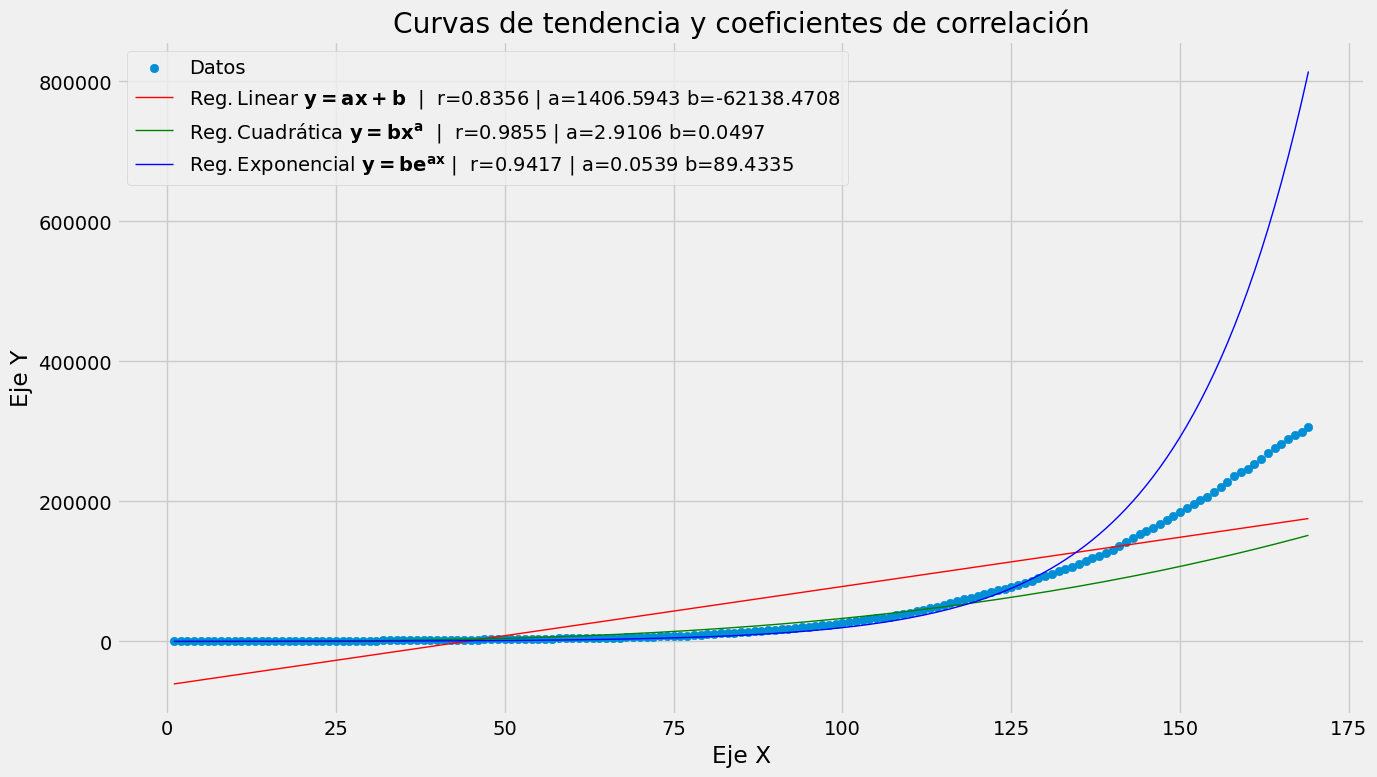

In [8]:
plt.figure(figsize=(14, 8))

# Agregar un único eje al cual se le aplicará el gráfico
ax = plt.subplot(1, 1, 1)

# Calcular los valores de y correspondientes a las funciones
y_vals_linear = linear.obtenerEcuacion()(x_col)
y_vals_cuadra = cuadratica.obtenerEcuacion()(x_col)
y_vals_exp = exponencial.obtenerEcuacion()(x_col)

# Gráfico de dispersión
ax.scatter(df.iloc[:,0],df.iloc[:,1])

# Gráfico de regresión lineal
ax.plot(x_col, y_vals_linear, color='red', linewidth=1)

# Gráfico de regresión cuadrática
ax.plot(x_col, y_vals_cuadra, color='green', linewidth=1)

# Gráfico de regresión exponcencial
ax.plot(x_col, y_vals_exp, color='blue', linewidth=1)

# Textos a imprimir
linearTXT = fr"$\mathregular{{Reg. Linear}}$ $\mathbf{{ y = ax + b}}$  |  r={linear.pearsonError(True)} | a={linear.calcularA(True)} b={linear.calcularB(True)}"
cuadraTXT = fr"$\mathregular{{Reg. Cuadrática}}$ $\mathbf{{ y = bx^a }}$  |  r={cuadratica.pearsonError(True)} | a={cuadratica.calcularA(True)} b={cuadratica.calcularB(True)}"
expTXT = fr"$\mathregular{{Reg. Exponencial}}$ $\mathbf{{ y = be^{{ax}} }}$ |  r={exponencial.pearsonError(True)} | a={exponencial.calcularA(True)} b={exponencial.calcularB(True)}"

# Personalizar el gráfico
ax.set_title("Curvas de tendencia y coeficientes de correlación")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.legend(["Datos", linearTXT , cuadraTXT, expTXT])
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [9]:
cuadraticaDerivada = DiferenciasNumericas(x_col, cuadratica.obtenerEcuacion())
dfConDerivadas = df.copy()

dfConDerivadas['d1'], dfConDerivadas['d2'] = zip(*[cuadraticaDerivada.calcular(i) for i, _ in enumerate(x_col)])
dfConDerivadas.iloc[:,2:4] = dfConDerivadas.iloc[:,2:4].round(Presicion.presicionActual())

dfConDerivadas.head()

,día,acumulados,d1,d2
0,1,1,0.3240,0.1297
1,2,1,0.5833,0.1297
2,3,2,1.2182,0.1878
3,4,8,2.0818,0.2441
4,5,9,3.1681,0.2991


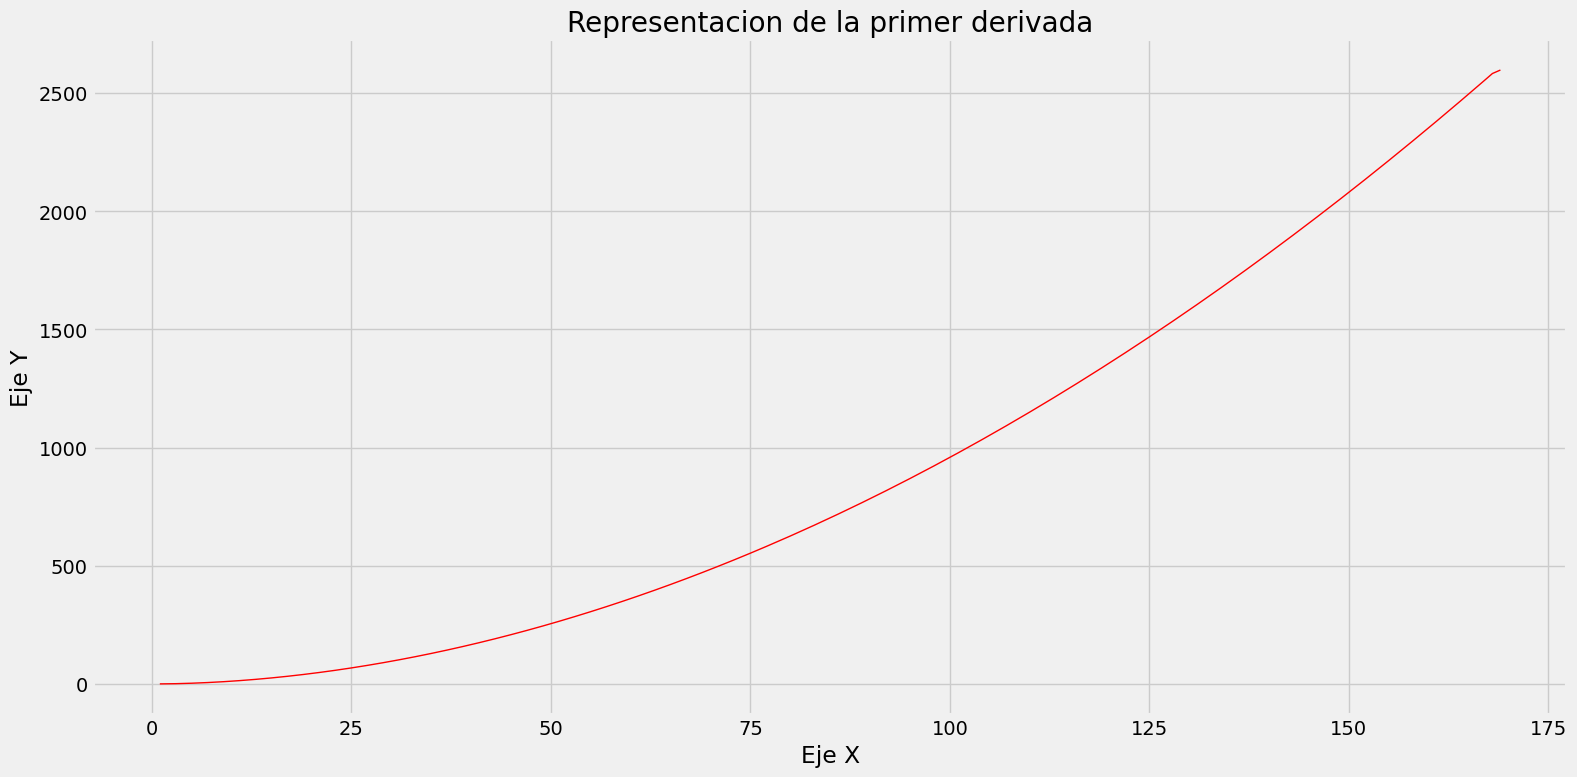

In [10]:
plt.figure(figsize=(16, 8))

# Agregar un único eje al cual se le aplicará el gráfico
ax2 = plt.subplot(1, 1, 1)

# Calcular los valores de y correspondientes a las funciones
y_vals_d1 = dfConDerivadas.iloc[:,2]

# Gráfico de derivada primera
ax2.plot(x_col, y_vals_d1, color='red', linewidth=1)

# Personalizar el gráfico
ax2.set_title("Representacion de la primer derivada")
ax2.set_xlabel("Eje X")
ax2.set_ylabel("Eje Y")
ax2.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

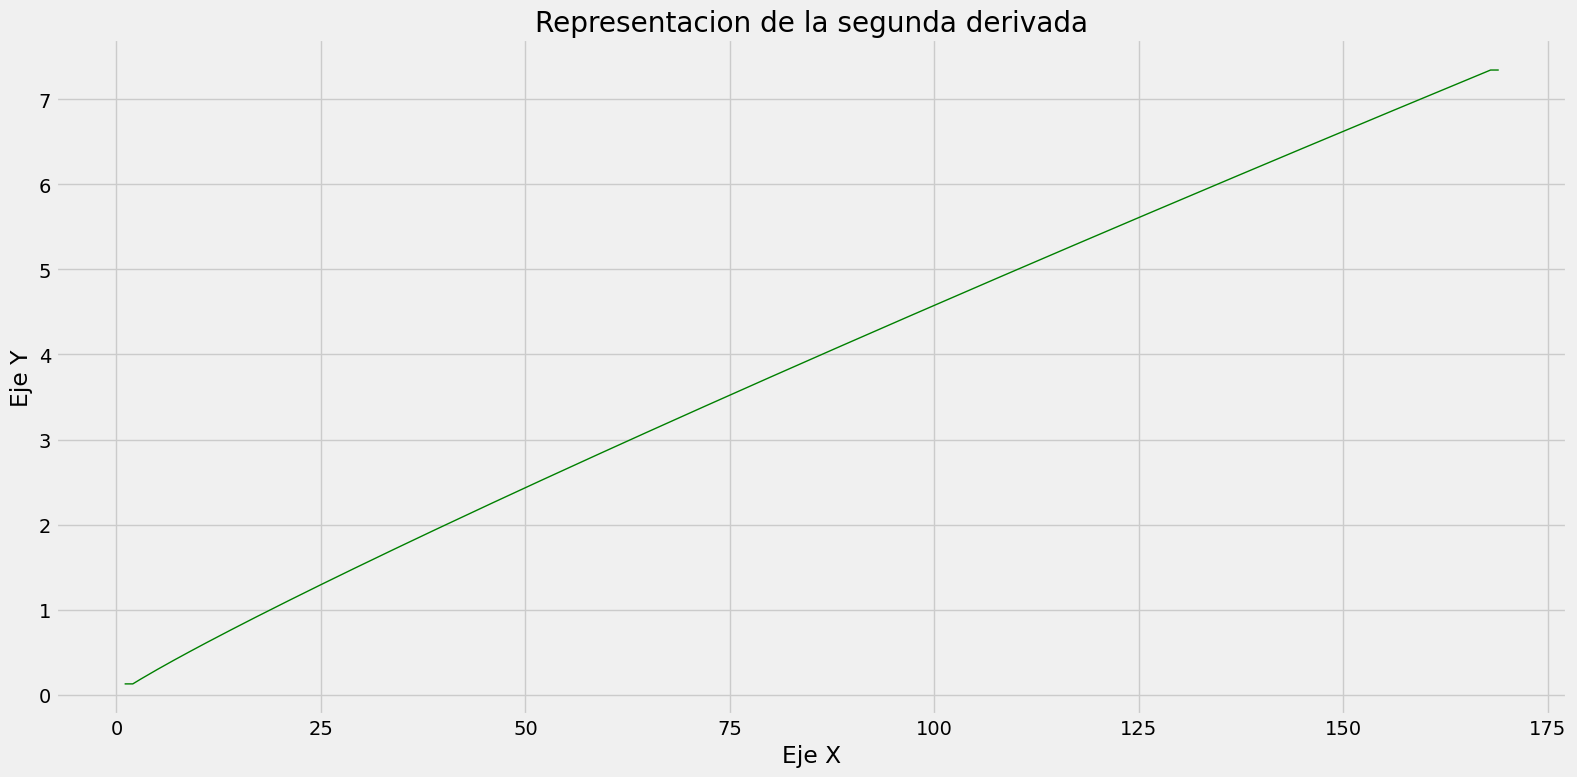

In [11]:
plt.figure(figsize=(16, 8))

# Agregar un único eje al cual se le aplicará el gráfico
ax3 = plt.subplot(1, 1, 1)

# Calcular los valores de y correspondientes a las funciones
y_vals_d2 = dfConDerivadas.iloc[:,3]

# Gráfico de derivada segunda
ax3.plot(x_col, y_vals_d2, color='green', linewidth=1)

# Personalizar el gráfico
ax3.set_title("Representacion de la segunda derivada")
ax3.set_xlabel("Eje X")
ax3.set_ylabel("Eje Y")
ax3.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [12]:
tiempoDuplicacion = calcularTiempoDuplicacion(exponencial)
duplica = tiempoDuplicacion + x_col.iloc[-1]
duplicadoExacto = y_col.iloc[-1]*2
duplicadoEstimado = cuadratica.obtenerEcuacion()(duplica) + y_col.iloc[-1]

print(f"El tiempo para duplicar si la tasa de crecimiento se mantiene constante será de: {tiempoDuplicacion} unidades de tiempo y sucedera aproximadamente cerca de {duplica}.")

El tiempo para duplicar si la tasa de crecimiento se mantiene constante será de: 12.8494 unidades de tiempo y sucedera aproximadamente cerca de 181.8494.


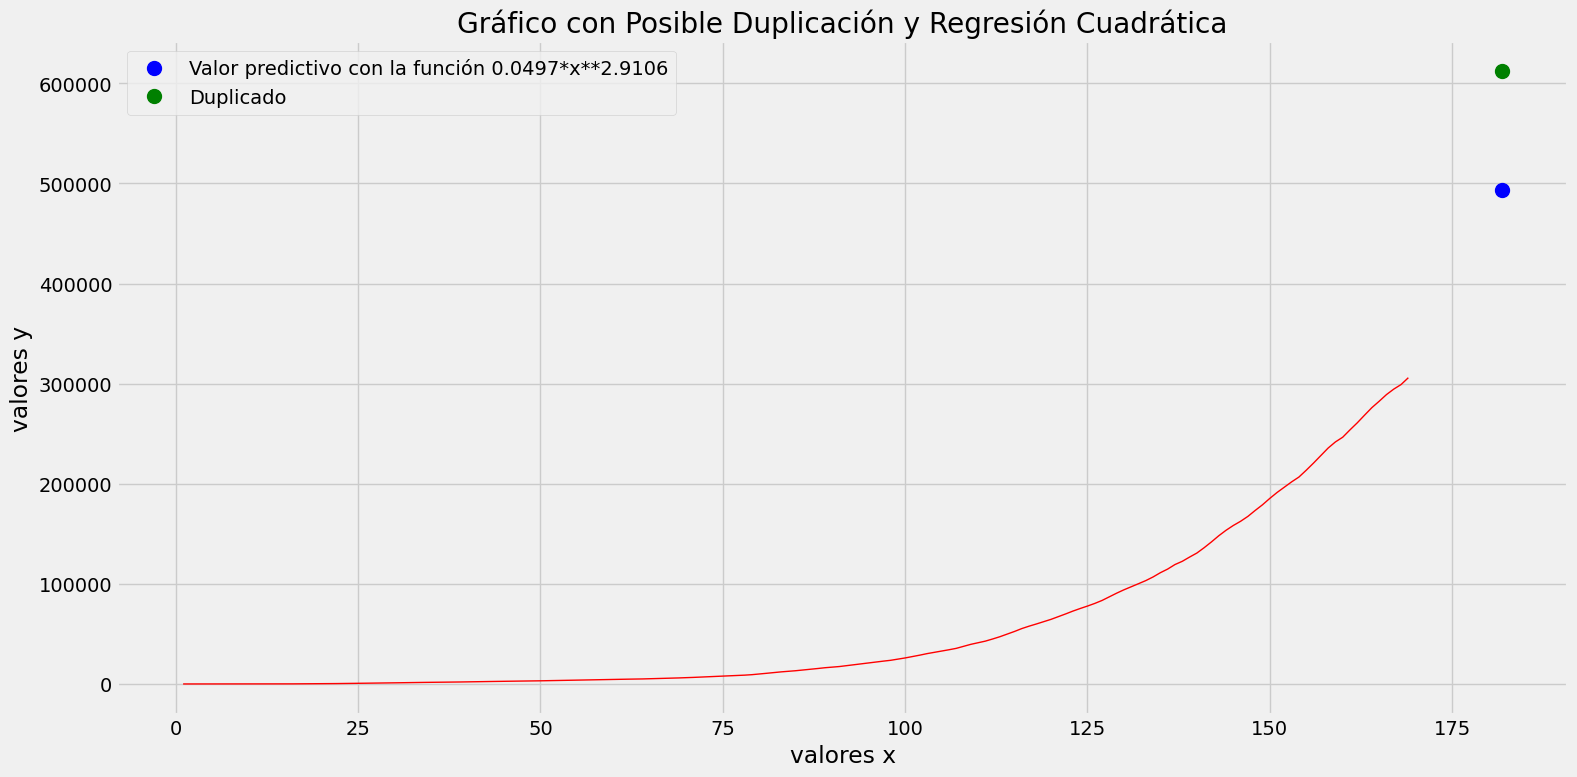

In [13]:
plt.figure(figsize=(16, 8))

# Agregar un único eje al cual se le aplicará el gráfico
ax4 = plt.subplot(1, 1, 1)

# Crea el gráfico
ax4.plot(x_col, y_col, color='red', linewidth=1)
ax4.plot(duplica, duplicadoEstimado, 'bo', markersize=10, label=f'Valor predictivo con la función {cuadratica.imprimirEcuacion()}')
ax4.plot(duplica, duplicadoExacto, 'go', markersize=10, label='Duplicado')

# Agrega etiquetas y título al gráfico
ax4.set_xlabel('valores x')
ax4.set_ylabel('valores y')
ax4.set_title('Gráfico con Posible Duplicación y Regresión Cuadrática')
ax4.legend()

# Muestra el gráfico
plt.tight_layout()
plt.show()
